<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CU04_Optimización de vacunas</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>10.- Imbalanced Analysis</font>

<font color='steelblue'>Data Balancing is the process to obtain an adequate data balance if is required, in order to have the adequate amount of data that reflects the intrinsic structure of the problem to be solved.</font>

## <font color='steelblue'>Tasks</font>

<font color='steelblue'><b>Imbalanced Analysis</b>	
    
<font color='steelblue'><b>Evaluate Imbalanced Classification Models</b>
    
<font color='steelblue'><b>Select appropiate metrics</b>
    
<font color='steelblue'><b>Data Balancing</b>
    
- Undersampling the Majority Class
- Oversampling the Minority Class
- Mix under-oversampling
- Evaluate a model with random oversampling and undersampling
    
<font color='steelblue'><b>Cost-Sensitive Algorithms</b>



## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: CU_04_08_20_vacunacion_gripe_train_and_test.csv</font>
- <font color='steelblue'> <b>No aplica</font>

### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [1]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

Warning message in Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8"):
“OS reports request to set locale to "es_ES.UTF-8" cannot be honored”


[1] ""

## <font color='green'>Settings</font>

### Libraries to use

In [2]:
library(readr)
library(dplyr)
library(tidyr)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Paths

In [3]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [ ]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [5]:
iFile <- "CU_04_08_20_vacunacion_gripe_train_and_test.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_04_08_20_vacunacion_gripe_train_and_test.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [6]:
data <- read_csv(file_data)


Rows: 21736 Columns: 49
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): GEOCODIGO, DESBDT, nombre_zona
dbl (45): ano, semana, n_vacunas, n_citas, tmed, prec, velmedia, presMax, be...
lgl  (1): is_train

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


<font color='tomato'>Visualizo los datos.</font>

Estructura de  los datos:

In [7]:
data |> glimpse()

Rows: 21,736
Columns: 49
$ GEOCODIGO         <chr> "259", "260", "041", "025", "046", "159", "065", "09…
$ DESBDT            <chr> "V Centenario", "Valdeacederas", "Canillejas", "Bara…
$ ano               <dbl> 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2021, 2023…
$ semana            <dbl> 34, 8, 9, 49, 24, 3, 8, 47, 1, 2, 52, 39, 16, 50, 34…
$ n_vacunas         <dbl> 0, 0, 0, 292, 0, 524, 0, 248, 204, 205, NA, 0, 0, 51…
$ n_citas           <dbl> 0, 0, 0, 280, 0, 498, 0, 228, 198, 187, NA, 0, 0, 51…
$ tmed              <dbl> 27.278748, 9.577289, 8.536554, 9.065363, 29.905728, …
$ prec              <dbl> 0.169955881, 1.264910043, 3.122881160, 7.313886680, …
$ velmedia          <dbl> 2.297067, 1.890425, 2.418071, 1.562328, 2.564749, 1.…
$ presMax           <dbl> 940.0420, 944.1770, 949.7179, 941.8342, 940.5669, 95…
$ benzene           <dbl> 0.1764413, 0.4591543, 0.4099159, 0.4224172, 0.195865…
$ co                <dbl> 0.4987735, 0.3960647, 0.3951587, NA, 0.2891224, 0.50…
$ no           

Muestra de los primeros datos:

In [8]:
data |> slice_head(n = 5)

GEOCODIGO,DESBDT,ano,semana,n_vacunas,n_citas,tmed,prec,velmedia,presMax,⋯,t9_1,t10_1,t11_1,t12_1,area,densidad_hab_km,tuits_gripe,interes_gripe,Target,is_train
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
259,V Centenario,2022,34,0,0,27.278748,0.16995588,2.297067,940.0420,⋯,0.5151383,0.09258503,0.6406787,0.7028586,2100118.9,15131.524,60,24,24,TRUE
260,Valdeacederas,2022,8,0,0,9.577289,1.26491004,1.890425,944.1770,⋯,0.3863876,0.13151901,0.5451465,0.6277335,1164622.0,22498.286,56,15,15,TRUE
041,Canillejas,2022,9,0,0,8.536554,3.12288116,2.418071,949.7179,⋯,0.3129631,0.13926119,0.4600730,0.5346482,1597474.5,17939.566,72,24,24,TRUE
025,Barajas,2022,49,292,280,9.065363,7.31388668,1.562328,941.8342,⋯,0.4611972,0.10460043,0.5920292,0.6590530,3816572.0,5893.247,196,77,77,TRUE
046,Castelló,2022,24,0,0,29.905728,0.01366852,2.564749,940.5669,⋯,0.7018126,0.06114283,0.4717699,0.5025317,870986.8,17738.501,46,21,21,TRUE


## Imbalanced Analysis

Loading required package: ggplot2

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
Warning message:
“Removed 572 rows containing non-finite values (`stat_bin()`).”


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   8.00   24.00   40.50   45.66   68.00  100.00     572 

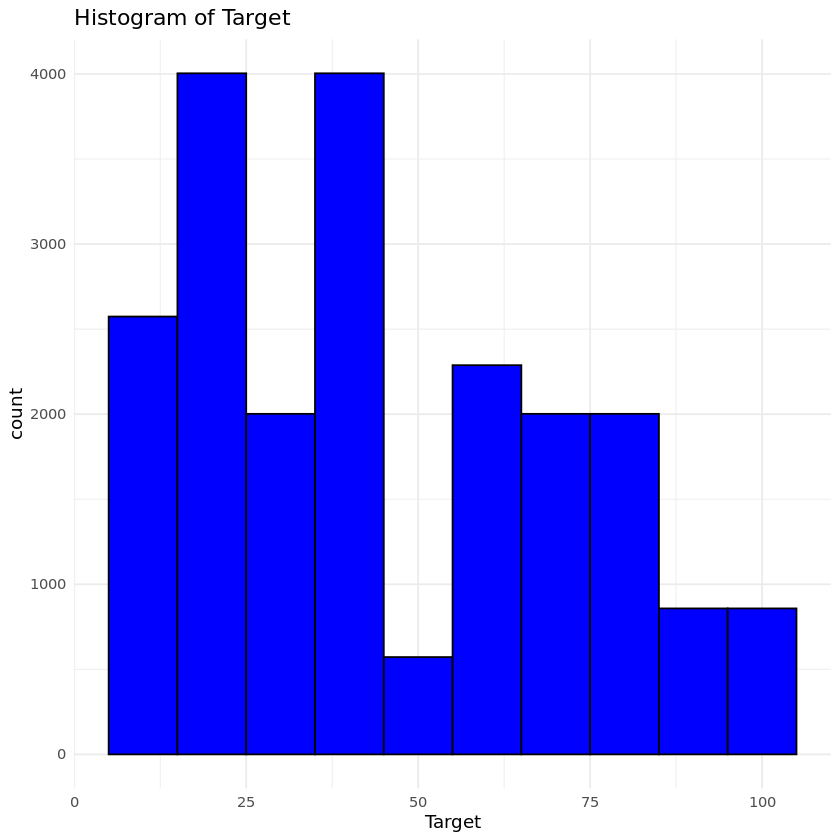

In [9]:
# If not already installed, install the ggplot2 package
if(!require(ggplot2)) install.packages('ggplot2')

# Load the ggplot2 package
library(ggplot2)

# Select the column name
column_name <- "Target"  # replace with your column name

# Create a histogram of the numeric column
ggplot(data, aes_string(x = column_name)) +
  geom_histogram(binwidth = 10, fill = "blue", color = "black") +
  theme_minimal() +
  ggtitle(paste("Histogram of", column_name))

# Calculate basic statistical measures
summary(data[[column_name]])

## Evaluate Imbalanced Classification Models

No aplica

## Undersampling the Majority Class

No aplica

## Oversampling the Minority Class

No aplica

## Combine Data Undersampling and Oversampling with SMOTEENN

In [ ]:
No aplica

## Evaluating a model with random oversampling and undersampling

In [ ]:
No aplica

## Cost-Sensitive Algorithms

In [ ]:
No aplica